In [236]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [237]:
from sklearn.datasets import load_wine

In [238]:
wine = load_wine(as_frame=True)
df = wine.frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [239]:
df.shape

(178, 14)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [241]:
df.describe(include='all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [242]:
df.columns.str.strip()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [243]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

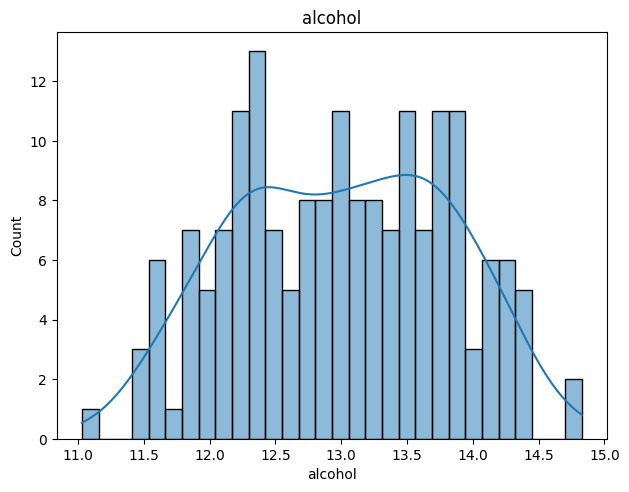

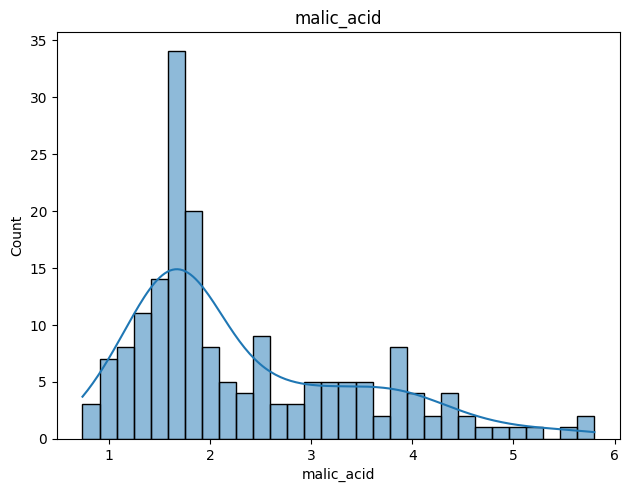

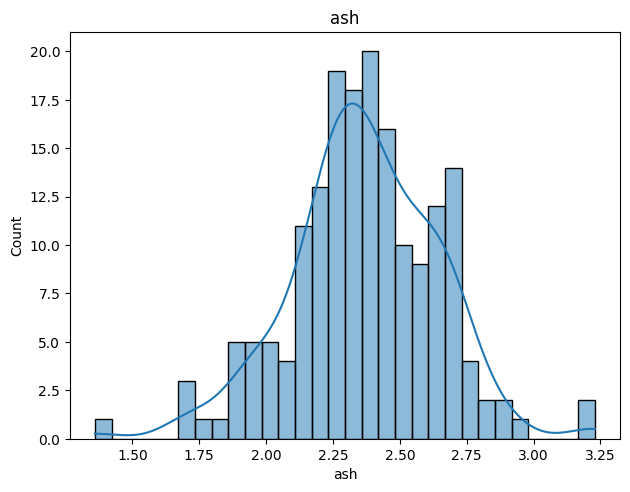

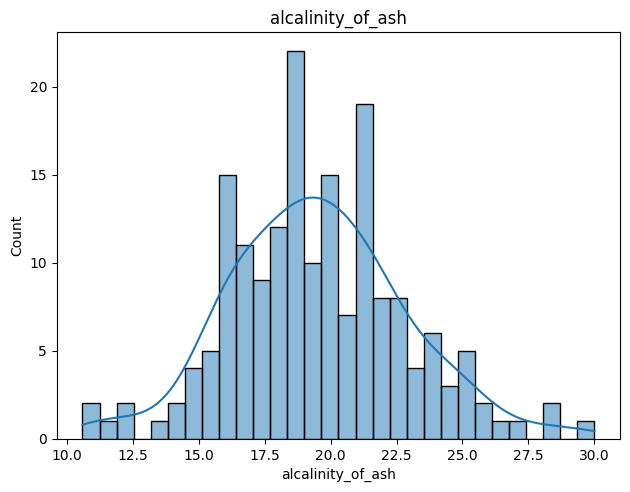

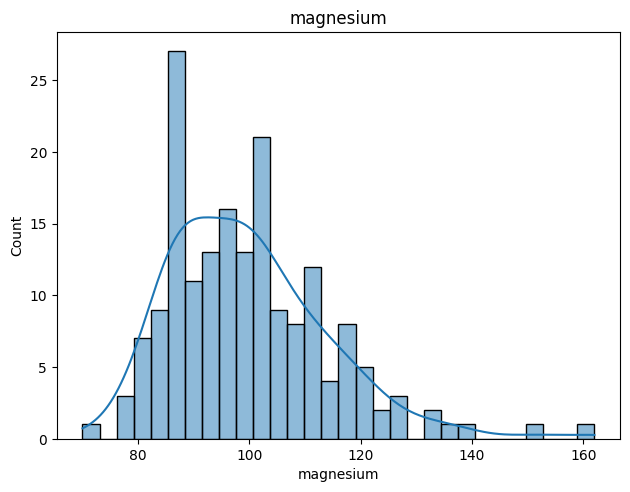

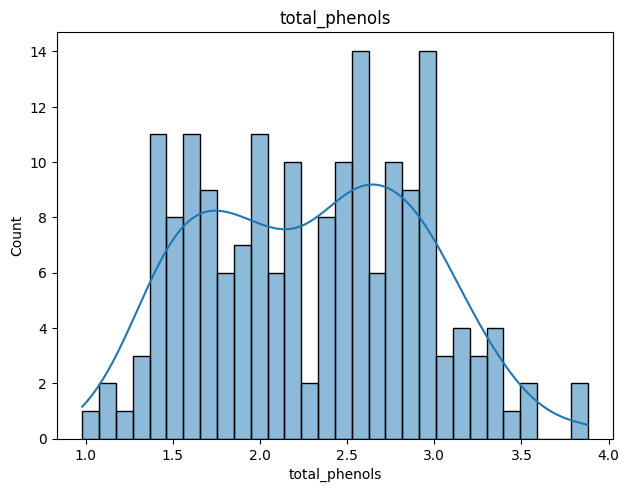

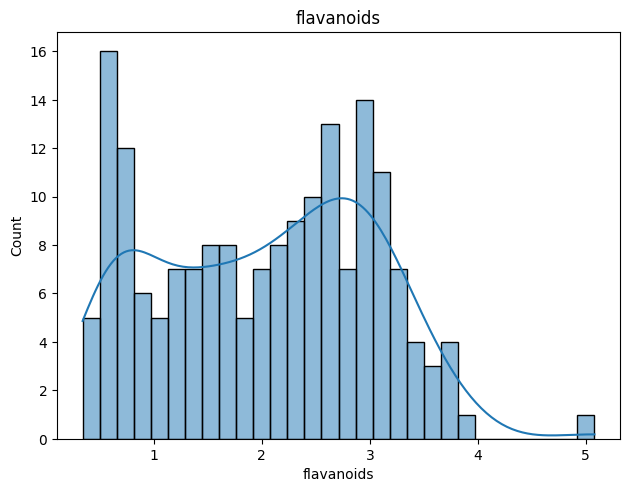

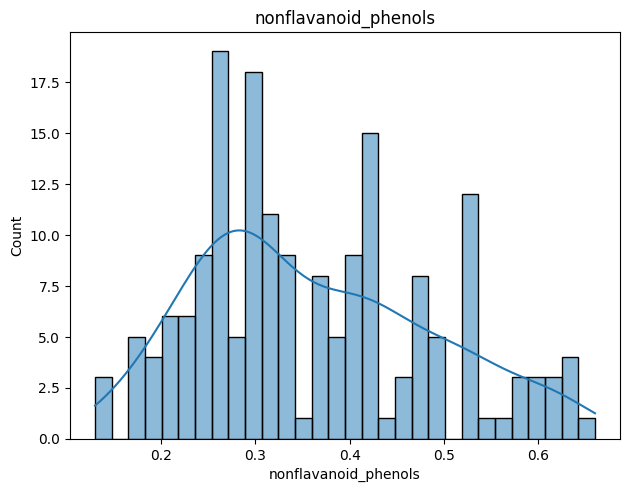

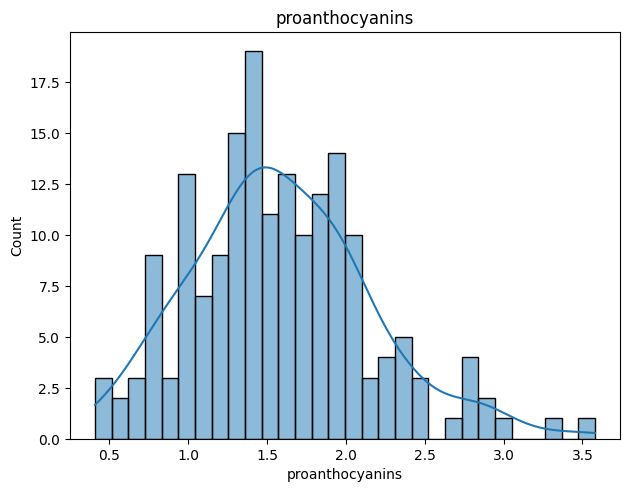

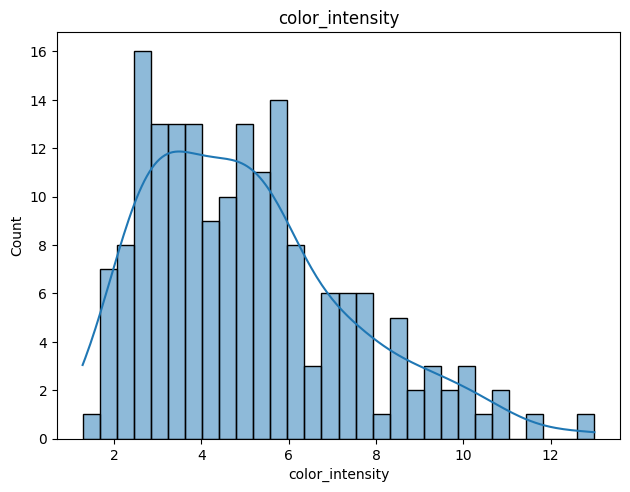

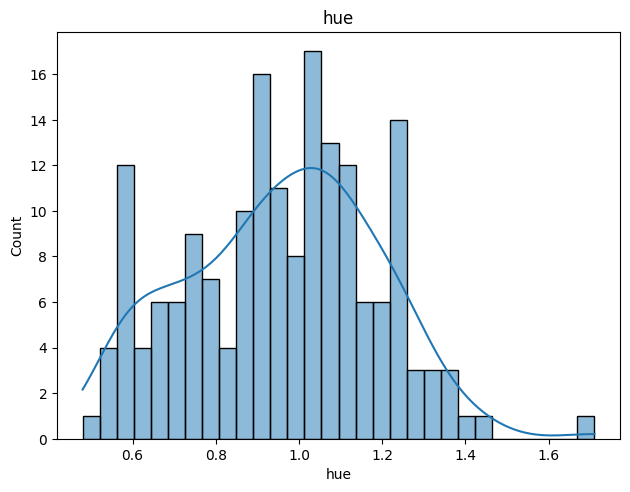

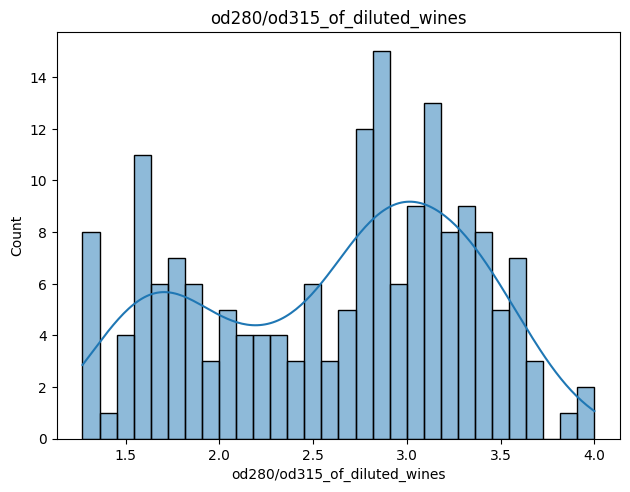

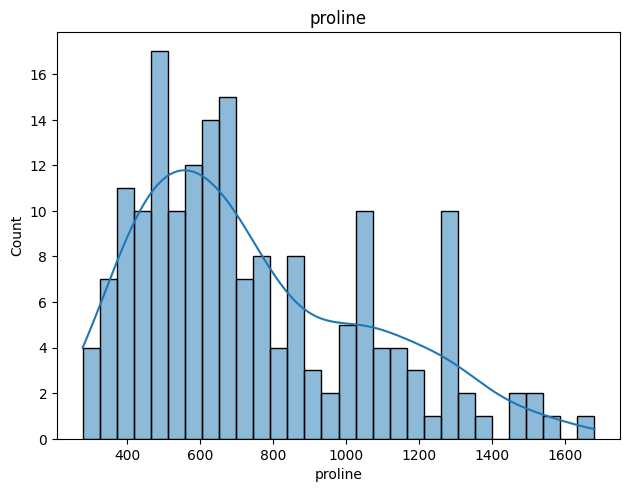

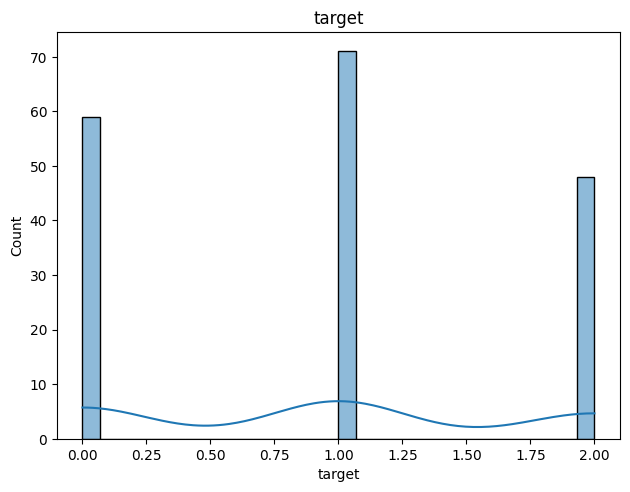

In [244]:
for col in df:
    sns.histplot(data= df[col] , kde=True , bins=30)
    plt.tight_layout()
    plt.title(f'{col}')
    plt.show()

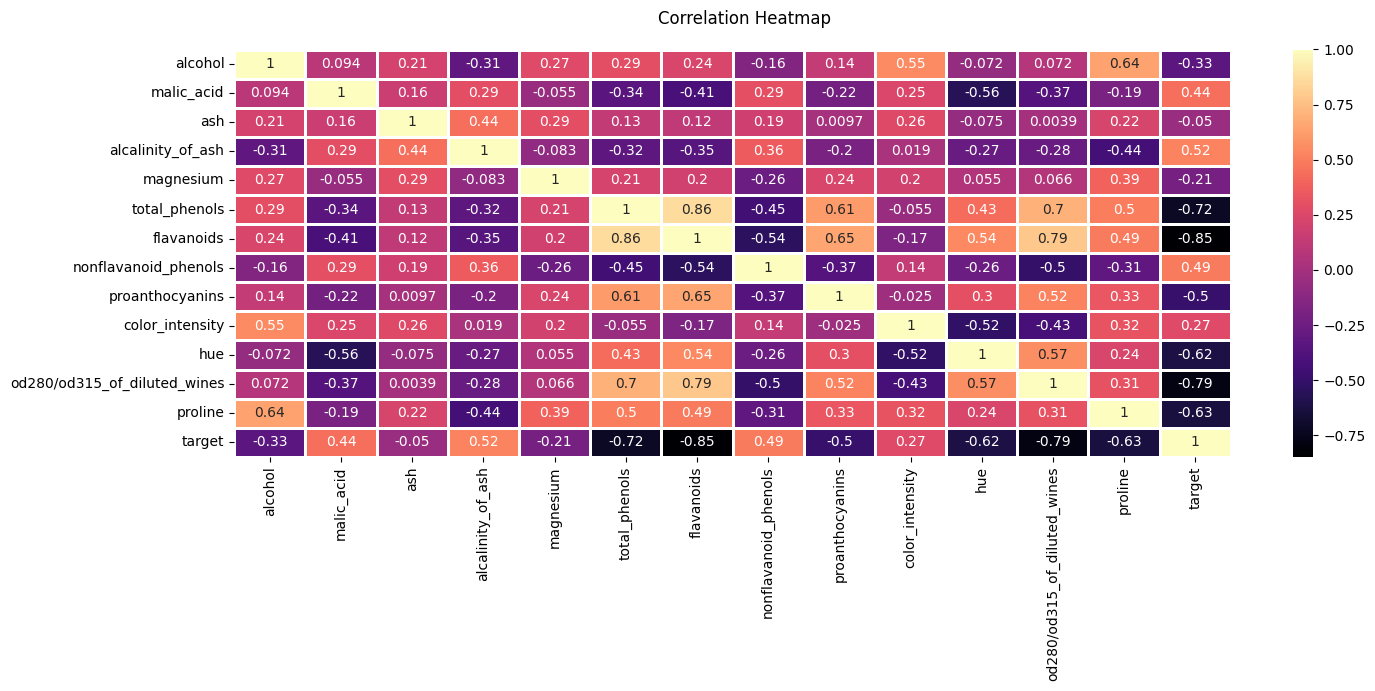

In [245]:
plt.figure(figsize=(15,7))
sns.heatmap(data= df.corr() , annot=True , linewidths=1 , cmap='magma')
plt.suptitle('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [246]:
x = df.drop(columns=['target'] , axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['Values'] = [variance_inflation_factor(x.values , i) for i in range(x.shape[1])]
VIF.sort_values(by=['Values'] , ascending=False)

,Features,Values
0,alcohol,206.189057
2,ash,165.640370
3,alcalinity_of_ash,73.141564
4,magnesium,67.364868
5,total_phenols,62.786935
11,od280/od315_of_diluted_wines,54.539165
10,hue,45.398407
6,flavanoids,35.535602
8,proanthocyanins,17.115665
9,color_intensity,17.022272


In [247]:
x.shape

(178, 13)

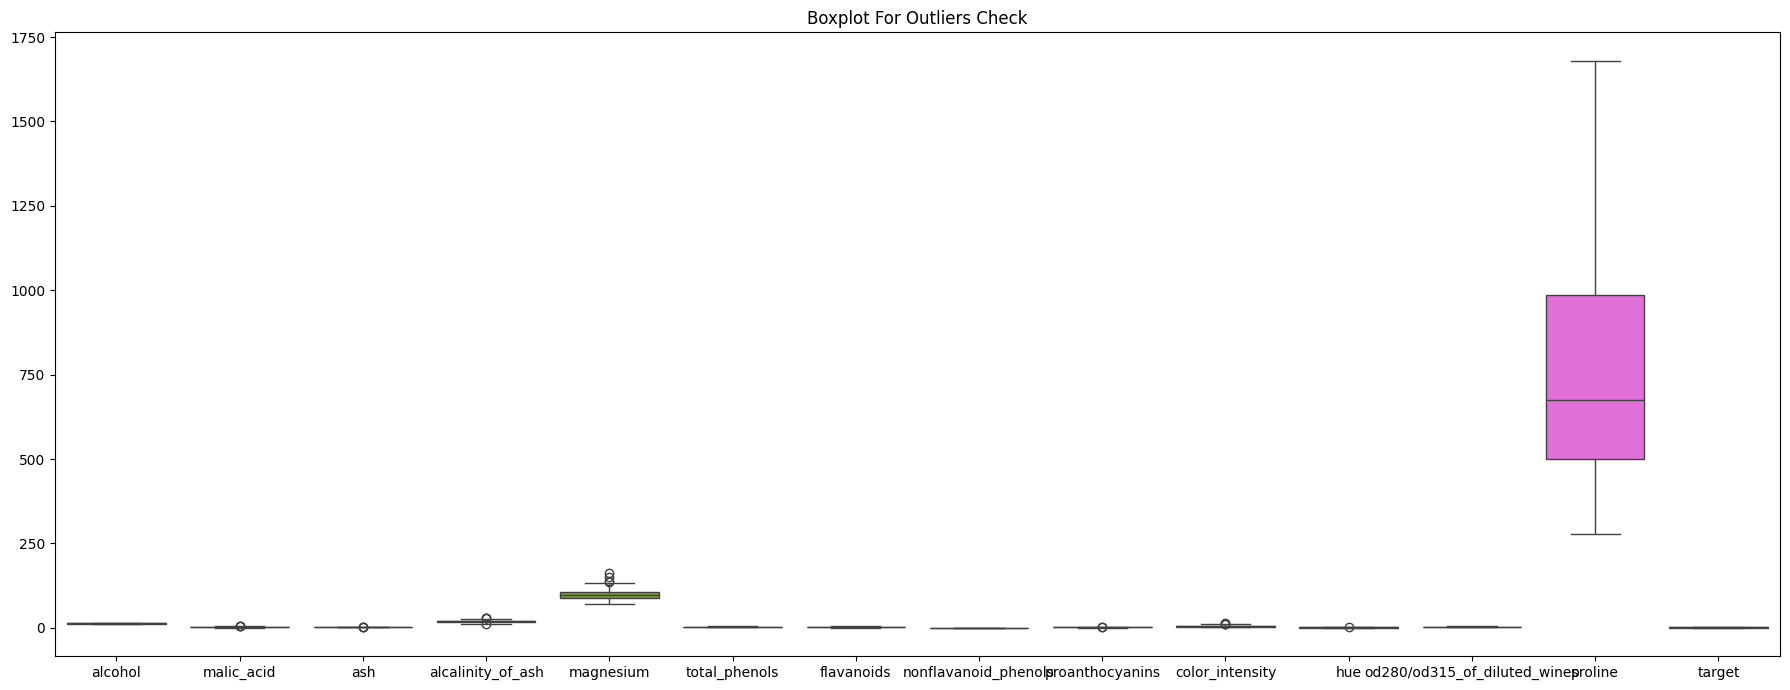

In [248]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df)
plt.title('Boxplot For Outliers Check')
plt.tight_layout()
plt.show()

In [249]:
df.shape

(178, 14)

In [250]:
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [251]:
df = df.drop('target' , axis=1 , errors='ignore')

In [252]:
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [253]:
isf = IsolationForest(contamination=0.04 , random_state=42)
outlier_Pred = isf.fit_predict(df.select_dtypes(include=['number']))
mask_outliers = outlier_Pred != -1 

df_clean = df[mask_outliers].reset_index(drop=True)

In [254]:
removed = (outlier_Pred== -1).sum()
total = len(outlier_Pred)
print(f"Outliers removed: {removed} ({removed/total*100:.2f}%)")


Outliers removed: 8 (4.49%)


In [255]:
df_clean

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
166,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
167,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
168,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [256]:
scaler = StandardScaler()                               #FROM THE HISTPLOTS STATISTICS , DATA DISTRIBUTION LOOKS LIKE GAUSSIAN, SO I WILL GO WITH STANDARDSCALER()
scaled_df = scaler.fit_transform(df_clean)

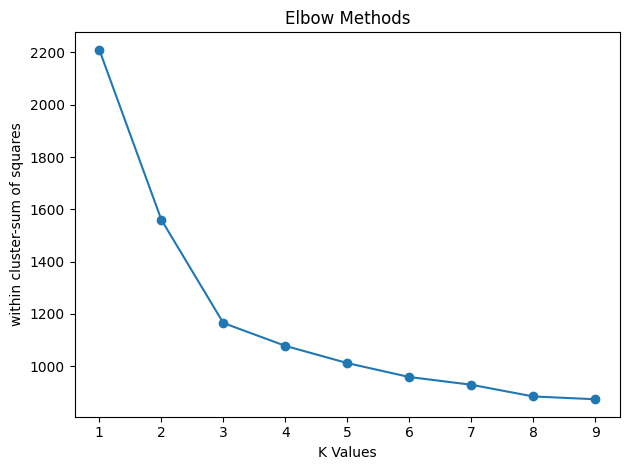

In [257]:
#ELBOW METHODS : USED FOR FINIDING THE OPTIMAL 'K' 
inertia = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit_transform(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(K , inertia , marker='o')
plt.title('Elbow Methods')
plt.xlabel('K Values')
plt.ylabel('within cluster-sum of squares')
plt.tight_layout()
plt.show()

In [258]:
#SILHOUTTE SCORE FOR CORSS CHECK

#HIGHEST SILHOUTTE SCORE = BETTER CLUSTERING
scores = {}

for k in range(2,12):
    kmeans = KMeans(random_state=42 , n_clusters=k)
    kmeans.fit(scaled_df)
    scores[k] = silhouette_score(scaled_df , kmeans.labels_)
scores

{2: 0.2742476291060489,
 3: 0.2956678287504518,
 4: 0.24467101240313838,
 5: 0.20742256988650049,
 6: 0.14530855990972125,
 7: 0.12219233653591022,
 8: 0.1346555650822985,
 9: 0.12770054211495693,
 10: 0.12767379597674822,
 11: 0.14001162097568162}

In [259]:
k = 3 
model = KMeans(n_clusters=k , random_state=42 , algorithm='elkan' , max_iter=300 , n_init='auto')
model

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'elkan'


In [260]:
labels = model.fit_predict(scaled_df)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [261]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [262]:
model.cluster_centers_

array([[-0.94639111, -0.39181151, -0.43074341,  0.30404415, -0.63217736,
        -0.061418  ,  0.0543117 ,  0.00762025,  0.02488613, -0.92934988,
         0.47437763,  0.29949893, -0.78427562],
       [ 0.09727667,  0.87390266,  0.17193822,  0.56694062,  0.01419814,
        -0.9930835 , -1.24695075,  0.70927088, -0.8445362 ,  0.92947837,
        -1.15770439, -1.29688458, -0.40493132],
       [ 0.88272168, -0.31534547,  0.29750625, -0.77211306,  0.63111851,
         0.87345983,  0.96312622, -0.58698514,  0.66440367,  0.18576504,
         0.46317466,  0.75463183,  1.12804079]])

In [263]:
df_clean['Clusters'] = labels                 #ADDING CLUSTERING LABELS TO THE ORIGINAL DATAFRAME 

In [264]:
silhouette_scr = silhouette_score(scaled_df , labels)
silhouette_scr

0.2956678287504518

In [265]:
pca = PCA(n_components=2 , random_state=42)
pca_data_df = pca.fit_transform(scaled_df)

In [266]:
pca_df = pd.DataFrame({
    'PCA1' : pca_data_df[:,0],
    'PCA2' : pca_data_df[:,1]
})

In [267]:
pca_df.head()

,PCA1,PCA2
0,3.471919,1.557220
1,2.354768,-0.287754
2,2.630568,0.882580
3,3.932513,2.670025
4,1.001880,0.950402


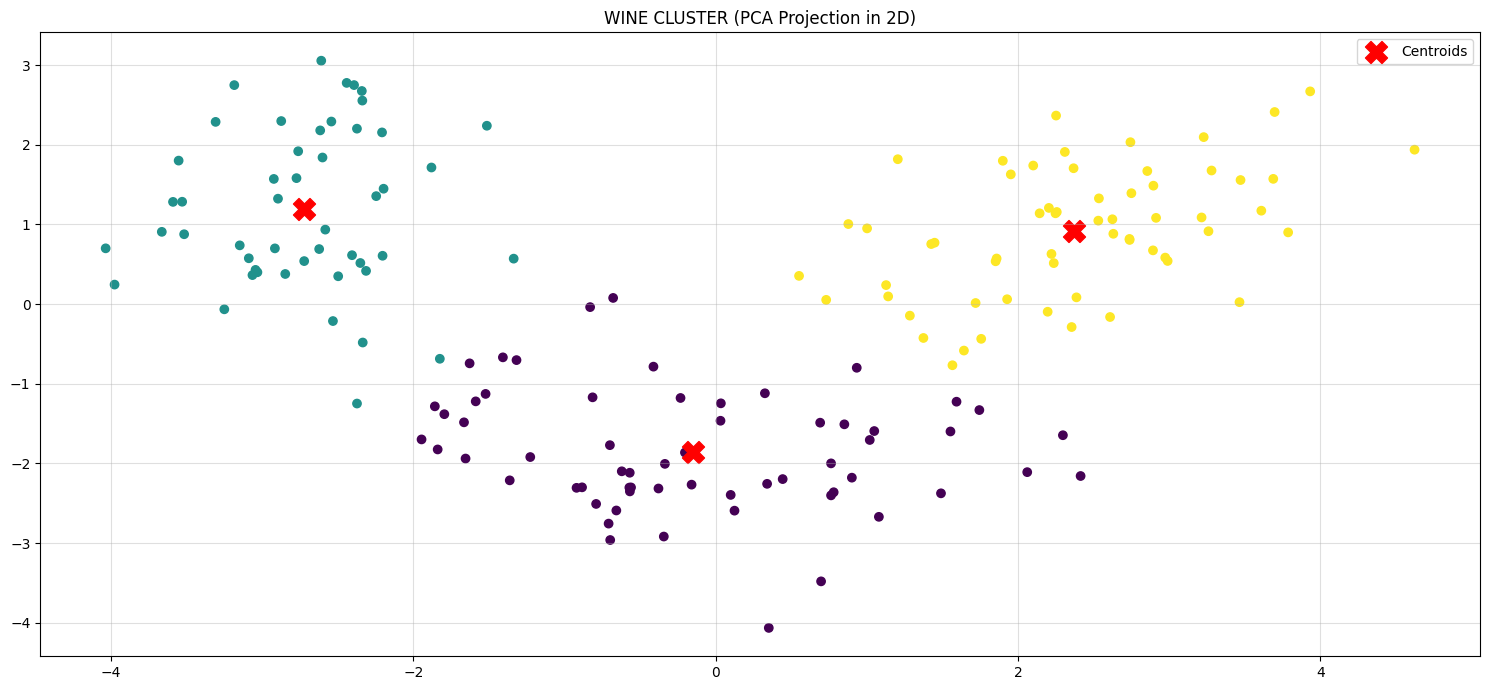

In [268]:
df_clean['PCA_1'] = pca_data_df[:,0]
df_clean['PCA_2'] = pca_data_df[:,1]

clusters_centers_calc = pca.transform(model.cluster_centers_) #pca.transform() converts the 13-dimensional center → 2D PCA center.

plt.figure(figsize=(15,7))
plt.scatter(pca_df['PCA1'],pca_df['PCA2'],c=model.labels_)
plt.scatter(
    clusters_centers_calc[:,0],
    clusters_centers_calc[:,1],
    c = 'red',
    marker = 'X',
    s=250,
    label = 'Centroids'
)
plt.title('WINE CLUSTER (PCA Projection in 2D)')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()

# """
# K-Means cluster centers were learned in original feature space.
# But your scatter plot uses PCA space (2D).
# So you must "project" the centroids into the same PCA space.
# pca.transform() converts the 13-dimensional center → 2D PCA center.
# This is very important; otherwise centroids will not align correctly.
# """

In [269]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [270]:
pca.components_

array([[ 0.177936  , -0.2333501 , -0.00770344, -0.28261096,  0.11846655,
         0.39026036,  0.42482855, -0.29388938,  0.31987826, -0.0710119 ,
         0.28119216,  0.36275913,  0.28764991],
       [ 0.45916321,  0.2320543 ,  0.29588   , -0.05079159,  0.37929165,
         0.03481852, -0.03362744,  0.00763501,  0.00333492,  0.51224891,
        -0.28044499, -0.18788598,  0.3501014 ]])

In [271]:
pca.explained_variance_

array([4.95495707, 2.65939437])

In [272]:
pca.explained_variance_ratio_

array([0.37890848, 0.20336545])